In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp
import pandas as pd
import numpy as np
from tqdm import tqdm

IS_DARK = False
theme, cs = rp.mpl_setup(IS_DARK)

In [2]:
from baysic.utils import json_to_df, load_mp20, df_to_json

mp20 = load_mp20('train')
mp20.head()

from pyxtal import Group
lattice_types = pd.Series([Group(g).lattice_type for g in range(1, 231)], index=range(1, 231))
mp20['lattice_type'] = lattice_types.loc[mp20['sg_number']].values
mp20.head()

,Unnamed: 0,material_id,formation_energy_per_atom,band_gap,pretty_formula,e_above_hull,struct,comp,sg_number,sg_symbol,conv,hall,wyckoffs,crystallographic_orbits,equivalent_atoms,std_mapping_to_primitive,lattice,num_atoms,sg
0,37228,mp-1221227,-1.637460,0.2133,Na3MnCoNiO6,0.043001,"[[-2.13163694 -1.97863317 -0.78933557] Na, [-1...","(Na, Mn, Co, Ni, O)",8,Cm,"[[11.33211764 1.514642 5.35627895] Na, [1....",C -2y,"[a, a, a, a, a, a, a, a, a, a, a, a]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2...",0.603093 -2.968643 0.000000\n0.000000 0.000000...,12,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...
1,19480,mp-974729,-0.314759,0.0000,Nd(Al2Cu)4,0.000000,"[[0. 0. 0.] Nd, [7.81740995 6.73412703 1.55353...","(Nd, Al, Cu)",139,I4/mmm,"[[0. 0. 0.] Nd, [4.450648 4.450648 2.599559] N...",-I 4 2,"[a, j, j, i, i, i, i, j, j, f, f, f, f]","[0, 1, 1, 3, 3, 3, 3, 1, 1, 9, 9, 9, 9]","[0, 1, 1, 3, 3, 3, 3, 1, 1, 9, 9, 9, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, ...",1.713765 4.489418 -1.984682\n1.713765 4.489418...,13,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...
2,29624,mp-1185360,-0.193761,0.0000,LiMnIr2,0.018075,[[5.00000041e-11 5.10035615e+00 0.00000000e+00...,"(Li, Mn, Ir)",225,Fm-3m,"[[0. 2.944692 0. ] Li, [0. 0....",-F 4 2 3,"[b, a, c, c]","[0, 1, 2, 2]","[0, 1, 2, 2]","[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]",1.202165 3.400237 2.082212\n1.202165 3.400237 ...,4,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...
3,38633,mp-1188861,-0.584694,3.8556,LiCSN,0.048847,"[[ 0.96469575 2.34470985 11.12401327] Li, [0....","(Li, C, S, N)",62,Pnma,"[[11.12401327 0.96469575 2.34470985] Li, [4....",-P 2ac 2n,"[c, c, c, c, c, c, c, c, c, c, c, c, c, c, c, c]","[0, 0, 0, 0, 4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 1...","[0, 0, 0, 0, 4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.858783 0.000000 0.000000\n-0.000000 5.345396...,16,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...
4,10889,mp-677272,-2.474759,0.4707,La2EuS4,0.000000,"[[ 0.03187948 -4.65810216 -3.8370089 ] La, [ 2...","(La, Eu, S)",122,I-42d,"[[6.584643 7.65405048 3.26744475] La, [7.654...",I -4 2bw,"[d, d, d, d, a, a, e, e, e, e, e, e, e, e]","[0, 0, 0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6]","[0, 0, 0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-3.552553 -6.184474 -2.579065\n-3.606854 6.184...,14,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...


In [4]:
from pyxtal import Group
lattice_types = pd.Series([Group(g).lattice_type for g in range(1, 231)], index=range(1, 231))
mp20['lattice_type'] = lattice_types.loc[mp20['sg_number']].values
mp20.head()

,Unnamed: 0,material_id,formation_energy_per_atom,band_gap,pretty_formula,e_above_hull,struct,comp,sg_number,sg_symbol,conv,hall,wyckoffs,crystallographic_orbits,equivalent_atoms,std_mapping_to_primitive,lattice,num_atoms,sg,lattice_type
0,37228,mp-1221227,-1.637460,0.2133,Na3MnCoNiO6,0.043001,"[[-2.13163694 -1.97863317 -0.78933557] Na, [-1...","(Na, Mn, Co, Ni, O)",8,Cm,"[[11.33211764 1.514642 5.35627895] Na, [1....",C -2y,"[a, a, a, a, a, a, a, a, a, a, a, a]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2...",0.603093 -2.968643 0.000000\n0.000000 0.000000...,12,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...,monoclinic
1,19480,mp-974729,-0.314759,0.0000,Nd(Al2Cu)4,0.000000,"[[0. 0. 0.] Nd, [7.81740995 6.73412703 1.55353...","(Nd, Al, Cu)",139,I4/mmm,"[[0. 0. 0.] Nd, [4.450648 4.450648 2.599559] N...",-I 4 2,"[a, j, j, i, i, i, i, j, j, f, f, f, f]","[0, 1, 1, 3, 3, 3, 3, 1, 1, 9, 9, 9, 9]","[0, 1, 1, 3, 3, 3, 3, 1, 1, 9, 9, 9, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, ...",1.713765 4.489418 -1.984682\n1.713765 4.489418...,13,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...,tetragonal
2,29624,mp-1185360,-0.193761,0.0000,LiMnIr2,0.018075,[[5.00000041e-11 5.10035615e+00 0.00000000e+00...,"(Li, Mn, Ir)",225,Fm-3m,"[[0. 2.944692 0. ] Li, [0. 0....",-F 4 2 3,"[b, a, c, c]","[0, 1, 2, 2]","[0, 1, 2, 2]","[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]",1.202165 3.400237 2.082212\n1.202165 3.400237 ...,4,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...,cubic
3,38633,mp-1188861,-0.584694,3.8556,LiCSN,0.048847,"[[ 0.96469575 2.34470985 11.12401327] Li, [0....","(Li, C, S, N)",62,Pnma,"[[11.12401327 0.96469575 2.34470985] Li, [4....",-P 2ac 2n,"[c, c, c, c, c, c, c, c, c, c, c, c, c, c, c, c]","[0, 0, 0, 0, 4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 1...","[0, 0, 0, 0, 4, 4, 4, 4, 8, 8, 8, 8, 12, 12, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3.858783 0.000000 0.000000\n-0.000000 5.345396...,16,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...,orthorhombic
4,10889,mp-677272,-2.474759,0.4707,La2EuS4,0.000000,"[[ 0.03187948 -4.65810216 -3.8370089 ] La, [ 2...","(La, Eu, S)",122,I-42d,"[[6.584643 7.65405048 3.26744475] La, [7.654...",I -4 2bw,"[d, d, d, d, a, a, e, e, e, e, e, e, e, e]","[0, 0, 0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6]","[0, 0, 0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-3.552553 -6.184474 -2.579065\n-3.606854 6.184...,14,((Rot:\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]...,tetragonal


In [3]:
# tot = json_to_df('logs/10-24/Tm4Fe8/1/total.json')
# tot.shape

# tot['normed_e_form'] = tot['e_form'] - tot['e_form'].median()
# quants = tot.groupby('group_symbol').quantile(np.linspace(0, 1, 11), numeric_only=True)['normed_e_form'].unstack()
# quants.columns = np.arange(len(quants.columns))
# quants['comp'] = tot['struct'][0].composition.to_pretty_string()
# quants

In [4]:
# from pathlib import Path

# dfs = []
# runs_path = Path('logs')
# for date in ('10-23','10-24'):
#     path = runs_path / date
#     for subdir in tqdm(list(path.iterdir())):
#         total_path = subdir / '1' / 'total.json'
#         if total_path.exists():
#             tot = json_to_df(total_path)
#             tot = tot.query('e_form < 20')
#             tot['normed_e_form'] = tot['e_form'] - tot['e_form'].median()
#             quants = tot[['group_symbol', 'normed_e_form']].groupby('group_symbol').quantile(np.linspace(0, 1, 11), numeric_only=True)['normed_e_form'].unstack()
#             quants.columns = np.arange(len(quants.columns))
#             quants['comp'] = tot['struct'].iloc[0].composition.to_pretty_string()
#             dfs.append(quants)

# df = pd.concat(dfs)
# print(df.shape)
# df_to_json(df, 'kernel.json')
# df.to_csv('kernel.csv')
# df.head()
df = pd.read_csv('kernel.csv')
print(df.shape)
df.head()

(8070, 13)


,group_symbol,0,1,2,3,4,5,6,7,8,9,10,comp
0,P-1,-0.922543,-0.791723,-0.366893,-0.268513,-0.222791,-0.194976,-0.021584,0.082213,0.159858,0.234903,0.446875,Cu3O7Y1Ba2
1,P-3m1,-1.251908,-0.952151,-0.816027,-0.722311,-0.648097,-0.572958,-0.450683,-0.376029,-0.043159,0.037290,0.906664,Cu3O7Y1Ba2
2,P-4,-0.970642,-0.627645,-0.490800,-0.416585,-0.160902,0.005972,0.040775,0.142405,0.361911,0.588913,2.783984,Cu3O7Y1Ba2
3,P-42m,-1.425604,-1.316554,-1.132035,-0.857084,-0.760947,-0.623245,-0.352267,0.100402,0.554920,2.349295,9.230939,Cu3O7Y1Ba2
4,P-4m2,-1.363689,-1.164838,-1.034908,-0.559669,-0.299414,-0.078374,0.736296,1.024969,1.427158,3.256239,4.043417,Cu3O7Y1Ba2


In [5]:
from pyxtal import Group

group_to_type = {sym: Group(sym).lattice_type for sym in set(df['group_symbol'])}

df['system'] = [group_to_type[sym] for sym in df['group_symbol']]
df.head()

,group_symbol,0,1,2,3,4,5,6,7,8,9,10,comp,system
0,P-1,-0.922543,-0.791723,-0.366893,-0.268513,-0.222791,-0.194976,-0.021584,0.082213,0.159858,0.234903,0.446875,Cu3O7Y1Ba2,triclinic
1,P-3m1,-1.251908,-0.952151,-0.816027,-0.722311,-0.648097,-0.572958,-0.450683,-0.376029,-0.043159,0.037290,0.906664,Cu3O7Y1Ba2,hexagonal
2,P-4,-0.970642,-0.627645,-0.490800,-0.416585,-0.160902,0.005972,0.040775,0.142405,0.361911,0.588913,2.783984,Cu3O7Y1Ba2,tetragonal
3,P-42m,-1.425604,-1.316554,-1.132035,-0.857084,-0.760947,-0.623245,-0.352267,0.100402,0.554920,2.349295,9.230939,Cu3O7Y1Ba2,tetragonal
4,P-4m2,-1.363689,-1.164838,-1.034908,-0.559669,-0.299414,-0.078374,0.736296,1.024969,1.427158,3.256239,4.043417,Cu3O7Y1Ba2,tetragonal


In [19]:
pivot = df.pivot_table('4', 'comp', 'group_symbol')
pivot.round(2)

group_symbol,Aea2,Aem2,Ama2,Amm2,C2,C2/c,C2/m,C222,C2221,Cc,...,Pnna,Pnnm,Pnnn,R-3,R-3c,R-3m,R3,R32,R3c,R3m
comp,,,,,,,,,,,,,,,,,,,,,
Al2O6H6,NaN,NaN,NaN,0.56,0.54,NaN,-0.73,0.79,NaN,NaN,...,NaN,-0.72,-0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba1Pu1O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca12Pd4,-0.55,0.06,-0.23,0.06,0.06,-0.17,-0.08,0.12,-0.63,-0.56,...,-0.08,0.13,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca1Mn4O8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca2Pb2Hg2,NaN,NaN,NaN,0.19,0.57,NaN,-0.14,-0.13,NaN,NaN,...,NaN,-0.23,-0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y2Mg2,NaN,NaN,NaN,-0.15,-0.57,NaN,-0.21,-0.35,NaN,NaN,...,NaN,-0.07,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2Pd6S8,NaN,NaN,NaN,0.19,0.35,NaN,-0.64,-0.23,NaN,NaN,...,NaN,-0.25,-0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yb1Al2Si2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from scipy.stats import spearmanr
def nan_spearman(x, y):
    return spearmanr(x, y, nan_policy='omit')[0]
corrs = pivot.corr(method=nan_spearman)
corrs

group_symbol,Aea2,Aem2,Ama2,Amm2,C2,C2/c,C2/m,C222,C2221,Cc,...,Pnna,Pnnm,Pnnn,R-3,R-3c,R-3m,R3,R32,R3c,R3m
group_symbol,,,,,,,,,,,,,,,,,,,,,
Aea2,1.000000,0.029412,-0.149510,0.034314,0.095588,0.544118,0.289216,-0.272059,0.607843,0.335784,...,0.411765,-0.176471,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aem2,0.029412,1.000000,0.526961,0.112745,0.487745,0.367647,0.191176,0.144608,-0.112745,0.245098,...,0.450980,0.252451,-0.120098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ama2,-0.149510,0.526961,1.000000,0.502451,0.512255,0.073529,0.254902,-0.308824,-0.095588,-0.029412,...,0.465686,0.129902,-0.017157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amm2,0.034314,0.112745,0.502451,1.000000,0.101753,0.196078,-0.193163,-0.347041,0.024510,-0.392157,...,0.193627,-0.357041,-0.140408,1.0,NaN,1.0,NaN,1.0,1.0,NaN
C2,0.095588,0.487745,0.512255,0.101753,1.000000,0.259804,0.117857,0.097347,0.122549,0.252451,...,0.517157,0.363878,0.026429,1.0,NaN,1.0,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-3m,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.0,NaN,1.0,NaN,1.0,1.0,NaN
R3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
R32,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.0,NaN,1.0,NaN,1.0,1.0,NaN


In [2]:
from mp_api.client import MPRester

with MPRester() as mpr:
    entry = mpr.get_entry_by_material_id('mp-1111416')
    struct = mpr.get_structure_by_material_id('mp-1111416')
    conv = mpr.get_structure_by_material_id('mp-1111416', conventional_unit_cell=True)

entry

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/mp_api/client/mprester.py:227: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving ThermoDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

[mp-1111416-GGA ComputedStructureEntry - K2 Sc1 Tl1 F6 (K2ScTlF6)
 Energy (Uncorrected)     = -52.5862  eV (-5.2586  eV/atom)
 Correction               = -2.7720   eV (-0.2772  eV/atom)
 Energy (Final)           = -55.3582  eV (-5.5358  eV/atom)
 Energy Adjustments:
   MP2020 anion correction (F): -2.7720   eV (-0.2772  eV/atom)
 Parameters:
   potcar_spec            = [{'titel': 'PAW_PBE K_sv 06Sep2000', 'hash': '3e84f86d37f203a4fb01de36af57e430'}, {'titel': 'PAW_PBE Sc_sv 07Sep2000', 'hash': 'dc386f505ad0c43385a7715b4111cb75'}, {'titel': 'PAW_PBE Tl_d 06Sep2000', 'hash': '78590fbb9adc26deddfa2c1440ce2524'}, {'titel': 'PAW_PBE F 08Apr2002', 'hash': '180141c33d032bfbfff30b3bea9d23dd'}]
   is_hubbard             = False
   hubbards               = {}
   run_type               = GGA
 Data:
   oxide_type             = None
   aspherical             = True
   last_updated           = 2020-11-11 20:26:44.051000
   task_id                = mp-1787888
   material_id            = mp-1111416
  

Structure Summary
Lattice
    abc : 9.347282 9.347282 9.347282
 angles : 90.0 90.0 90.0
 volume : 816.6877391349689
      A : 9.347282 0.0 5.723559491013835e-16
      B : -5.723559491013835e-16 9.347282 5.723559491013835e-16
      C : 0.0 0.0 9.347282
    pbc : True True True
PeriodicSite: K (2.337, 2.337, 7.01) [0.25, 0.25, 0.75]
PeriodicSite: K (2.337, 7.01, 7.01) [0.25, 0.75, 0.75]
PeriodicSite: K (2.337, 7.01, 2.337) [0.25, 0.75, 0.25]
PeriodicSite: K (2.337, 2.337, 2.337) [0.25, 0.25, 0.25]
PeriodicSite: K (7.01, 2.337, 2.337) [0.75, 0.25, 0.25]
PeriodicSite: K (7.01, 7.01, 2.337) [0.75, 0.75, 0.25]
PeriodicSite: K (7.01, 7.01, 7.01) [0.75, 0.75, 0.75]
PeriodicSite: K (7.01, 2.337, 7.01) [0.75, 0.25, 0.75]
PeriodicSite: Sc (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: Sc (-2.862e-16, 4.674, 4.674) [0.0, 0.5, 0.5]
PeriodicSite: Sc (4.674, 0.0, 4.674) [0.5, 0.0, 0.5]
PeriodicSite: Sc (4.674, 4.674, 5.724e-16) [0.5, 0.5, 0.0]
PeriodicSite: Tl (4.674, 0.0, 2.862e-16) [0.5, 0.0, 0.0]
P

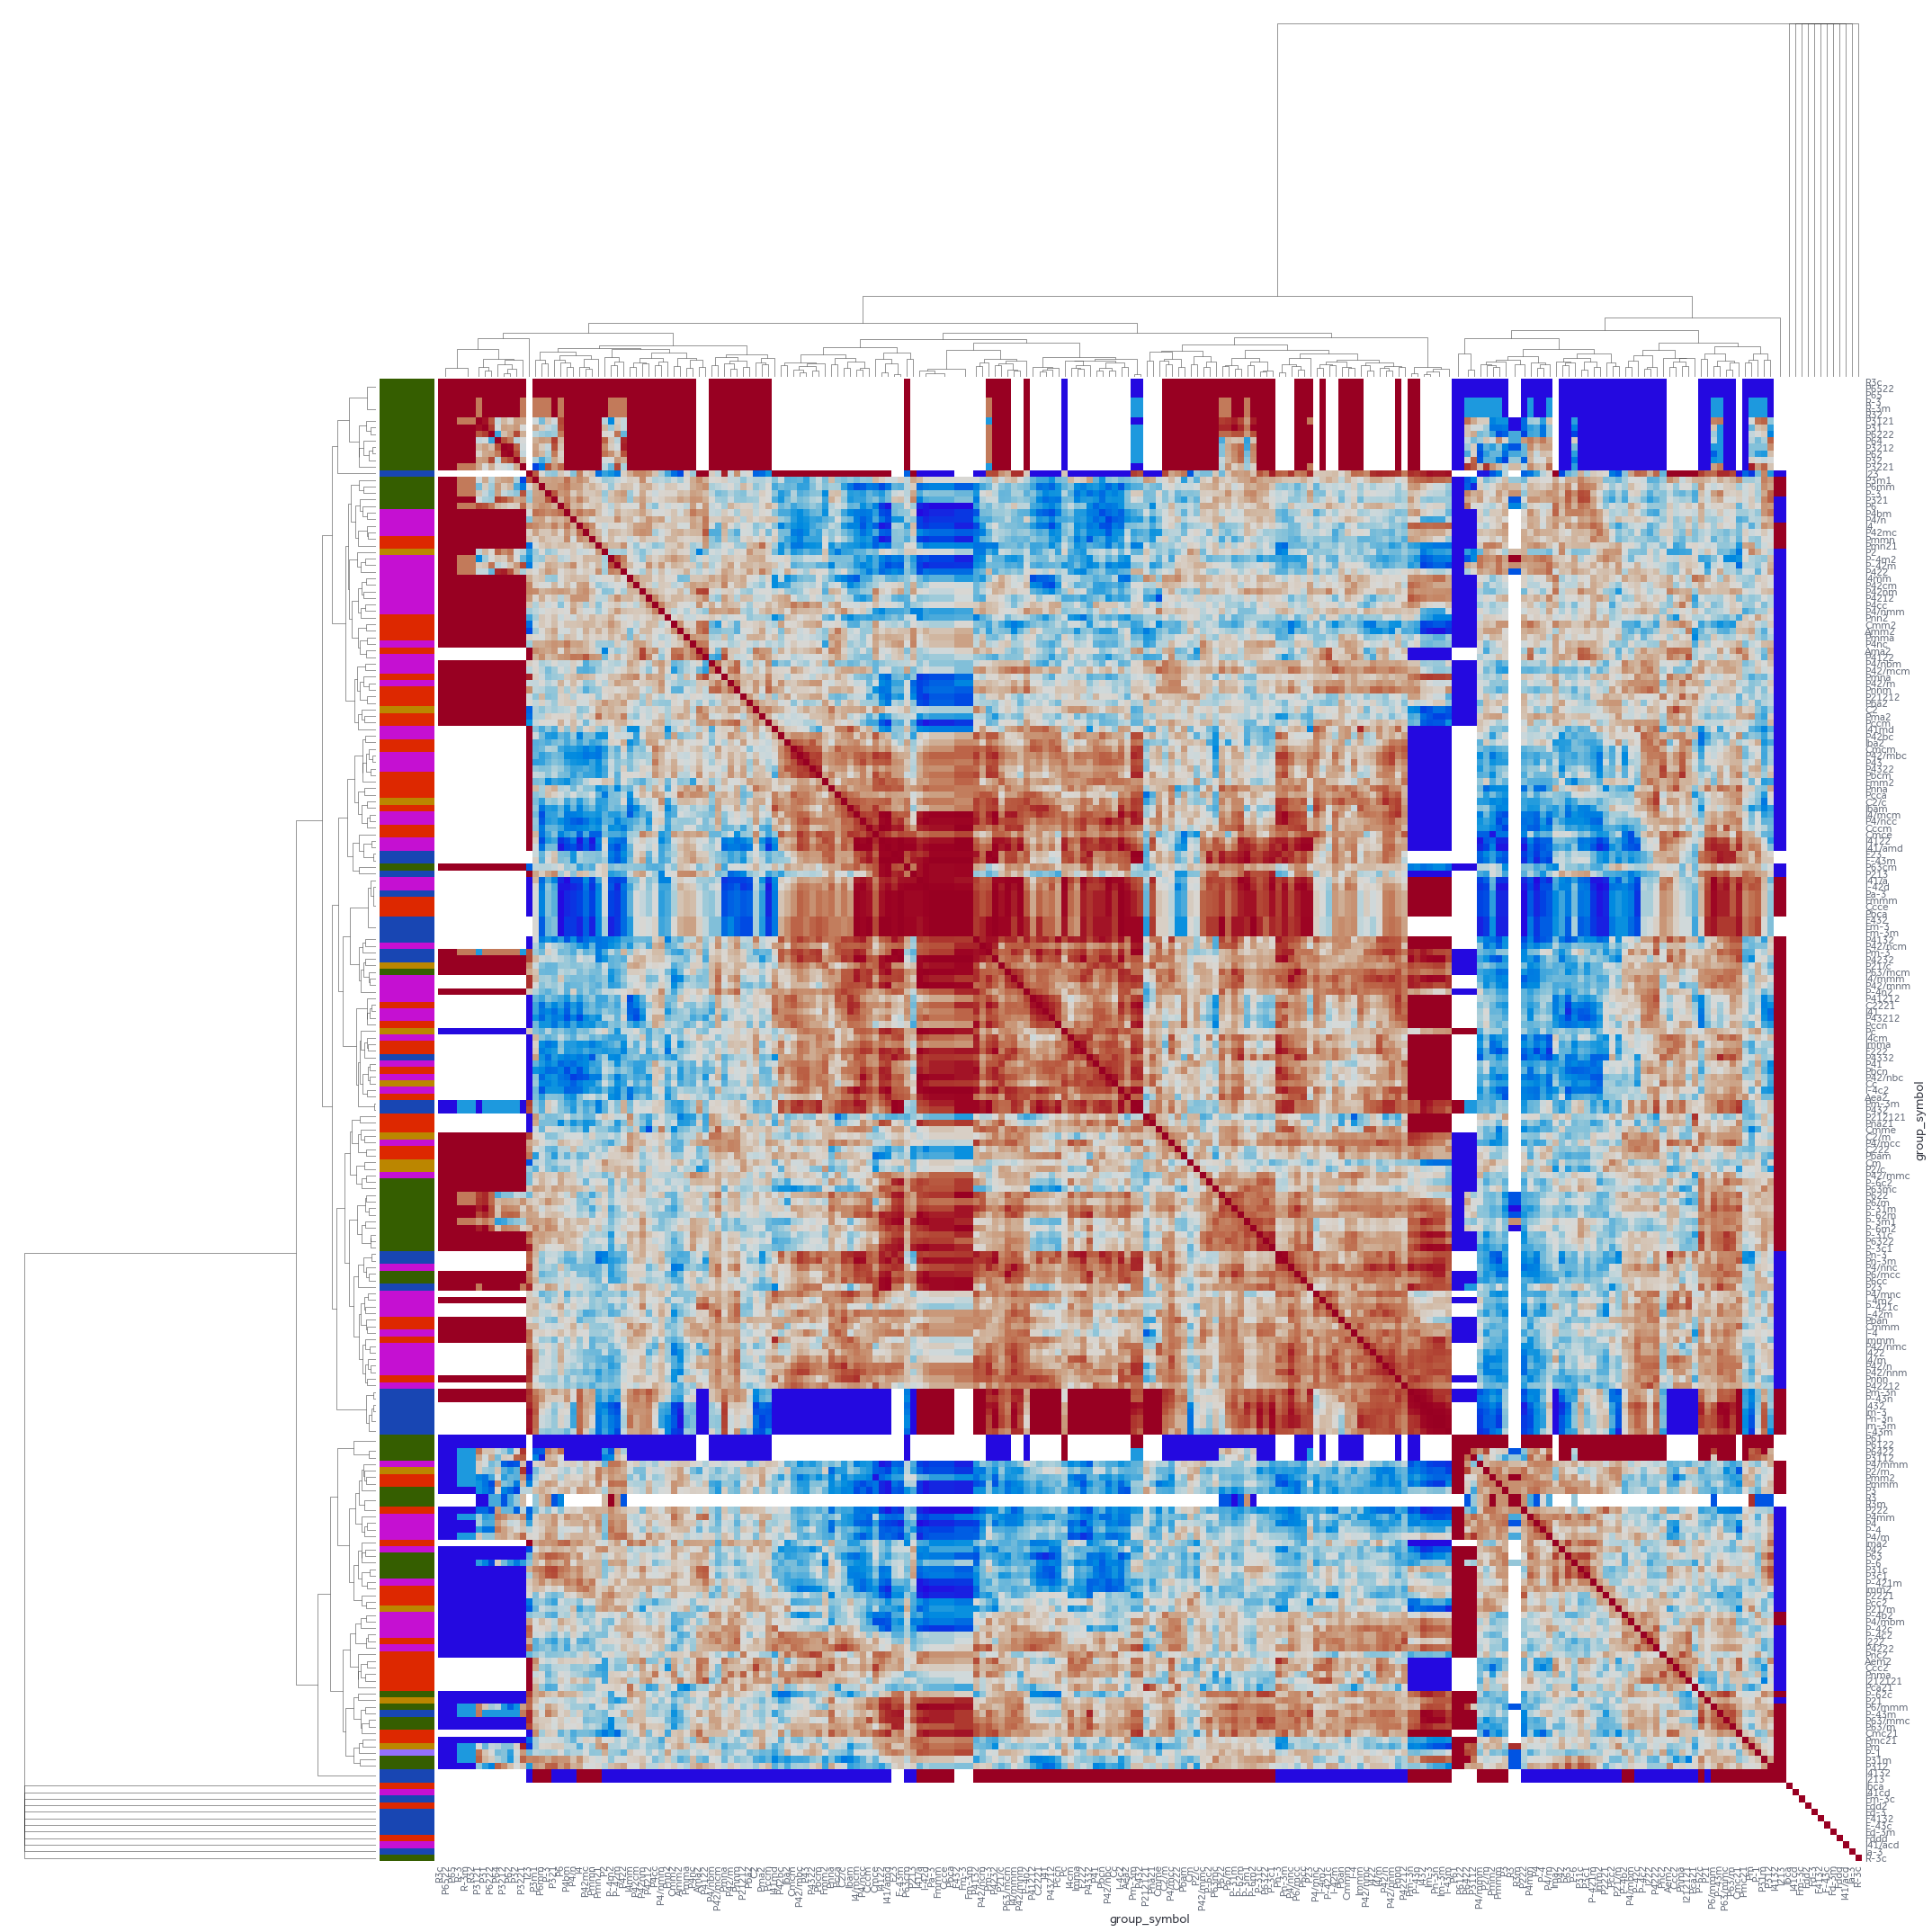

In [27]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import euclidean

def nan_dist(x, y):
    mask = ~(pd.isna(x) | pd.isna(y))
    if sum(mask) == 0:
        return np.nan

    x_nn, y_nn = x[mask], y[mask]
    return euclidean(x_nn, y_nn)


dists = pdist(corrs, metric=nan_dist)
dists[pd.isnull(dists)] = 100
linkage = linkage(dists, 'complete', optimal_ordering=True)
systems = sorted(set(group_to_type.values()))
colors = pd.Series({symb: cs[systems.index(group_to_type[symb])] for symb in corrs.index})

sns.clustermap(corrs, row_linkage=linkage, col_linkage=linkage, center=0, cmap='rho_div_coolwarm_shift', xticklabels=1, yticklabels=1, figsize=(30, 30), row_colors=colors, cbar_pos=None)

['cubic', 'hexagonal', 'monoclinic', 'orthorhombic', 'tetragonal', 'triclinic']


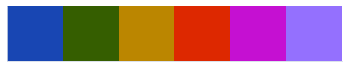

In [28]:
sns.palplot(cs[:6])
print(systems)

In [105]:
from spglib import get_spacegroup_type
full_symbols = pd.Series([get_spacegroup_type(Group(g).hall_number)['international_short'] for g in corrs.index], name='group_symbol')

from sklearn.manifold import TSNE
from scipy.spatial.distance import squareform

dists[dists == 100] = 0
pca = TSNE(n_components=2, perplexity=50)
xy = pca.fit_transform(squareform(dists))
pca_df = pd.DataFrame(xy, columns=['x', 'y'], index=full_symbols)
pca_df['system'] = [group_to_type[sym] for sym in corrs.index]
pca_df.index = pca_df.index.str.replace(r'_(\d)', lambda m: chr(int(f'208{m.groups()[0]}', base=16)), regex=True)
pca_df.index = pca_df.index.str.replace(r'-(\d)', '\\1\u0305', regex=True)
pca_df.query('system == "hexagonal"').iloc[::5]

,x,y,system
group_symbol,,,
P3̅,-0.904685,-5.285080,hexagonal
P6̅,-4.057883,-6.786752,hexagonal
P3,-4.241034,-8.869043,hexagonal
P31c,-4.713099,-6.937490,hexagonal
P3₂21,7.359766,-5.653675,hexagonal
P6/mcc,2.337853,5.100821,hexagonal
P622,3.053619,4.563396,hexagonal
P6₃/mmc,5.024870,8.528893,hexagonal
P6₄22,-3.631444,-10.926418,hexagonal


/home/nicholas/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/ds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<AxesSubplot:xlabel='x', ylabel='y'>

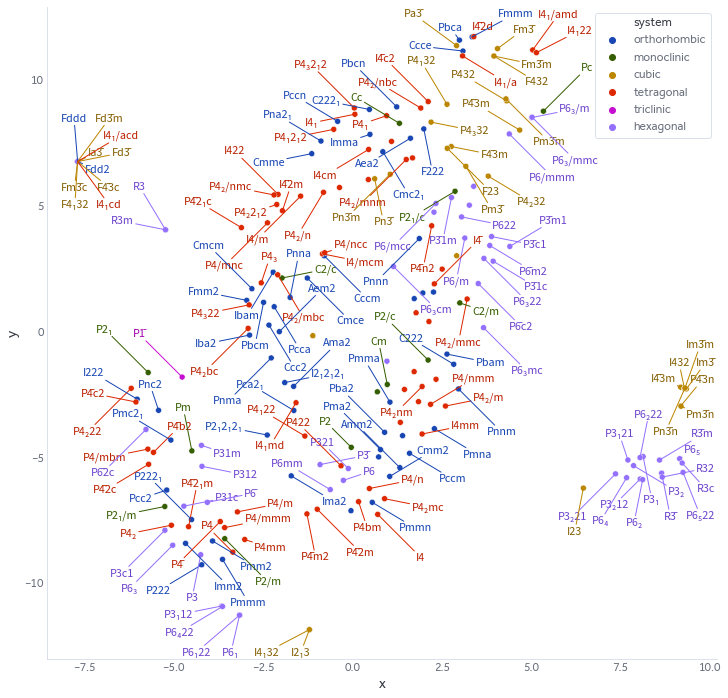

In [106]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(pca_df, x='x', y='y', hue='system', ax=ax)
rp.scatter_labels(pca_df.index, ax=ax, font='Source Sans Pro')

In [115]:
df

,group_symbol,0,1,2,3,4,5,6,7,8,9,10,comp,system
0,P-1,-0.922543,-0.791723,-0.366893,-0.268513,-0.222791,-0.194976,-0.021584,0.082213,0.159858,0.234903,0.446875,Cu3O7Y1Ba2,triclinic
1,P-3m1,-1.251908,-0.952151,-0.816027,-0.722311,-0.648097,-0.572958,-0.450683,-0.376029,-0.043159,0.037290,0.906664,Cu3O7Y1Ba2,hexagonal
2,P-4,-0.970642,-0.627645,-0.490800,-0.416585,-0.160902,0.005972,0.040775,0.142405,0.361911,0.588913,2.783984,Cu3O7Y1Ba2,tetragonal
3,P-42m,-1.425604,-1.316554,-1.132035,-0.857084,-0.760947,-0.623245,-0.352267,0.100402,0.554920,2.349295,9.230939,Cu3O7Y1Ba2,tetragonal
4,P-4m2,-1.363689,-1.164838,-1.034908,-0.559669,-0.299414,-0.078374,0.736296,1.024969,1.427158,3.256239,4.043417,Cu3O7Y1Ba2,tetragonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,Pm,-4.348300,-3.690216,-2.784054,-2.488715,-2.310880,-1.913238,-1.402516,-0.606233,0.147628,1.867622,4.178132,Ce3Al4Si6,monoclinic
8066,Pm-3,-3.329397,-0.639084,1.651003,2.700499,4.502805,5.783530,6.862316,7.808490,10.994331,14.171902,20.216918,Ce3Al4Si6,cubic
8067,Pm-3m,-3.407322,-0.253884,1.785375,3.102616,3.867536,4.928062,6.511054,7.984392,10.241006,13.304788,19.429515,Ce3Al4Si6,cubic
8068,Pmm2,-1.963901,-0.002941,0.453768,0.653274,0.893524,1.624769,2.334106,3.735388,4.558843,5.210984,8.498591,Ce3Al4Si6,orthorhombic
